# lever position analysis

In [1]:
%load_ext autoreload
%autoreload 2

%run ../../setup_project.py
%run ../../generic_plot_functions.py

import os.path
import shutil
from scipy.stats import mannwhitneyu, pearsonr, wilcoxon, binned_statistic,friedmanchisquare, linregress
import matplotlib.image as mpimg
from statannotations.Annotator import Annotator
from statannotations.stats.StatTest import StatTest
import matplotlib.patches as mpatches

In [2]:
projectName, dataPath, dlcModelPath, myProject, sSessions = setup_project_session_lists(projectName="autopi_mec",dataPath=PROJECT_DATA_PATH,dlcModelPath="")

creating myProject, an autopipy.project object
Project name: autopi_mec
dataPath: /ext_drives/d91/data/projects/jingjie/Peng_et.al_2025_noInt/
dlcModelPath: 
Reading /ext_drives/d91/data/projects/jingjie/Peng_et.al_2025_noInt//sessionList
We have 180 testing sessions in the list
spikeA.Kilosort_session objects are in sSessions


In [3]:
for ses in sSessions:
    ses.load_parameters_from_files() 

In [4]:
fn = dataPath+"/results/trialsTable"
df = pd.read_csv(fn)
df

,sessionName,name,valid,trialNo,startTime,endTime,startTimeWS,endTimeWS,duration,light,...,startPositionHoming_y,homingAngleAtPeriphery,homingErrorAtPeriphery,homingErrorAtPeripheryLever,homingErrorAtPeripheryLeverAbsolute,leverX,leverY,subject,date,homingErrorAtPeripheryAbsolute
0,mn8578-30112021-0107,mn8578-30112021-0107_1,True,1,1.638266e+09,1.638266e+09,3.330952,43.437132,40.106180,light,...,-11.459763,-1.610825,-0.083860,-0.083781,0.083781,1.643595,1.114050,mn8578,2021-11-30 01:07:00,0.083860
1,mn8578-30112021-0107,mn8578-30112021-0107_2,True,2,1.638266e+09,1.638266e+09,51.433192,68.696401,17.263209,light,...,-14.331650,-1.633013,-0.106048,-0.114553,0.114553,1.881237,-2.031261,mn8578,2021-11-30 01:07:00,0.106048
2,mn8578-30112021-0107,mn8578-30112021-0107_3,True,3,1.638266e+09,1.638266e+09,73.689115,105.833658,32.144543,light,...,-13.361742,-1.578244,-0.051279,-0.057984,0.057984,1.876152,-2.032935,mn8578,2021-11-30 01:07:00,0.051279
3,mn8578-30112021-0107,mn8578-30112021-0107_4,True,4,1.638266e+09,1.638266e+09,118.842181,153.795247,34.953066,light,...,-9.157124,-1.565123,-0.038158,-0.034961,0.034961,-1.429608,1.026417,mn8578,2021-11-30 01:07:00,0.038158
4,mn8578-30112021-0107,mn8578-30112021-0107_5,True,5,1.638266e+09,1.638266e+09,175.030779,214.734324,39.703545,light,...,-12.715746,-1.754851,-0.227887,-0.145241,0.145241,-20.592588,1.260800,mn8578,2021-11-30 01:07:00,0.227887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19746,jp499-25052023-0108,jp499-25052023-0108_110,True,110,1.685028e+09,1.685029e+09,6192.754920,6414.643001,221.888081,dark,...,-14.637493,3.055997,-1.579964,-2.634524,2.634524,-29.518042,-1.505637,jp499,2023-05-25 01:08:00,1.579964
19747,jp499-25052023-0108,jp499-25052023-0108_111,True,111,1.685029e+09,1.685029e+09,6426.638292,6460.432821,33.794529,light,...,-34.049265,-0.844326,0.802898,1.429400,1.429400,20.593755,-20.931358,jp499,2023-05-25 01:08:00,0.802898
19748,jp499-25052023-0108,jp499-25052023-0108_112,True,112,1.685029e+09,1.685029e+09,6478.443990,6528.834271,50.390282,dark,...,16.395909,1.745148,-2.890813,-2.601360,2.601360,-1.680767,30.069567,jp499,2023-05-25 01:08:00,2.890813
19749,jp499-25052023-0108,jp499-25052023-0108_113,True,113,1.685029e+09,1.685029e+09,6555.648851,6620.684408,65.035557,light,...,-29.429458,-1.619052,0.028171,0.100612,0.100612,-14.415291,-18.097031,jp499,2023-05-25 01:08:00,0.028171


In [5]:
df['distance'] = np.sqrt((df['leverX'] - df['leverX'].shift())**2 + (df['leverY'] - df['leverY'].shift())**2)

In [6]:
df

,sessionName,name,valid,trialNo,startTime,endTime,startTimeWS,endTimeWS,duration,light,...,homingAngleAtPeriphery,homingErrorAtPeriphery,homingErrorAtPeripheryLever,homingErrorAtPeripheryLeverAbsolute,leverX,leverY,subject,date,homingErrorAtPeripheryAbsolute,distance
0,mn8578-30112021-0107,mn8578-30112021-0107_1,True,1,1.638266e+09,1.638266e+09,3.330952,43.437132,40.106180,light,...,-1.610825,-0.083860,-0.083781,0.083781,1.643595,1.114050,mn8578,2021-11-30 01:07:00,0.083860,NaN
1,mn8578-30112021-0107,mn8578-30112021-0107_2,True,2,1.638266e+09,1.638266e+09,51.433192,68.696401,17.263209,light,...,-1.633013,-0.106048,-0.114553,0.114553,1.881237,-2.031261,mn8578,2021-11-30 01:07:00,0.106048,3.154275
2,mn8578-30112021-0107,mn8578-30112021-0107_3,True,3,1.638266e+09,1.638266e+09,73.689115,105.833658,32.144543,light,...,-1.578244,-0.051279,-0.057984,0.057984,1.876152,-2.032935,mn8578,2021-11-30 01:07:00,0.051279,0.005353
3,mn8578-30112021-0107,mn8578-30112021-0107_4,True,4,1.638266e+09,1.638266e+09,118.842181,153.795247,34.953066,light,...,-1.565123,-0.038158,-0.034961,0.034961,-1.429608,1.026417,mn8578,2021-11-30 01:07:00,0.038158,4.504185
4,mn8578-30112021-0107,mn8578-30112021-0107_5,True,5,1.638266e+09,1.638266e+09,175.030779,214.734324,39.703545,light,...,-1.754851,-0.227887,-0.145241,0.145241,-20.592588,1.260800,mn8578,2021-11-30 01:07:00,0.227887,19.164413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19746,jp499-25052023-0108,jp499-25052023-0108_110,True,110,1.685028e+09,1.685029e+09,6192.754920,6414.643001,221.888081,dark,...,3.055997,-1.579964,-2.634524,2.634524,-29.518042,-1.505637,jp499,2023-05-25 01:08:00,1.579964,54.564190
19747,jp499-25052023-0108,jp499-25052023-0108_111,True,111,1.685029e+09,1.685029e+09,6426.638292,6460.432821,33.794529,light,...,-0.844326,0.802898,1.429400,1.429400,20.593755,-20.931358,jp499,2023-05-25 01:08:00,0.802898,53.745240
19748,jp499-25052023-0108,jp499-25052023-0108_112,True,112,1.685029e+09,1.685029e+09,6478.443990,6528.834271,50.390282,dark,...,1.745148,-2.890813,-2.601360,2.601360,-1.680767,30.069567,jp499,2023-05-25 01:08:00,2.890813,55.652930
19749,jp499-25052023-0108,jp499-25052023-0108_113,True,113,1.685029e+09,1.685029e+09,6555.648851,6620.684408,65.035557,light,...,-1.619052,0.028171,0.100612,0.100612,-14.415291,-18.097031,jp499,2023-05-25 01:08:00,0.028171,49.821574


We define change in lever position as distance > 10 and no change as distance < 5. We do not consider trials in between.

In [7]:
df_mn=df[df.sessionName=='jp499-24052023-0108']

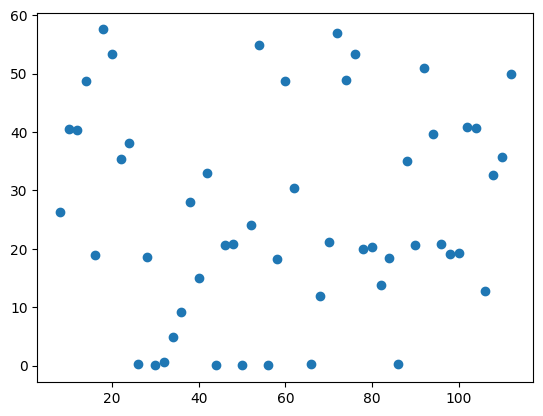

In [8]:
plt.scatter(df_mn[df_mn.light=='dark'].trialNo,df_mn[df_mn.light=='dark'].distance)

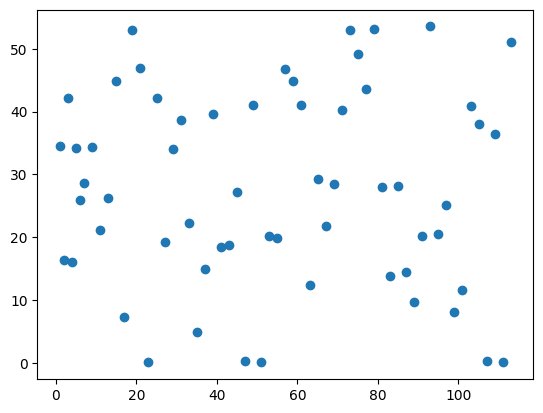

In [9]:
plt.scatter(df_mn[df_mn.light=='light'].trialNo,df_mn[df_mn.light=='light'].distance)

<Axes: xlabel='distance', ylabel='Probability'>

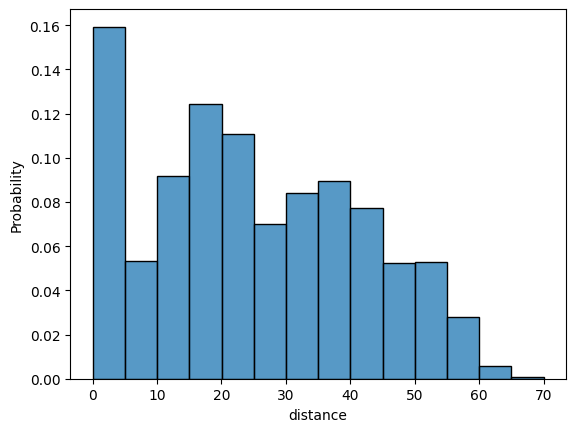

In [10]:
sns.histplot(df[df.light=='dark'].distance, stat='probability', binwidth=5)

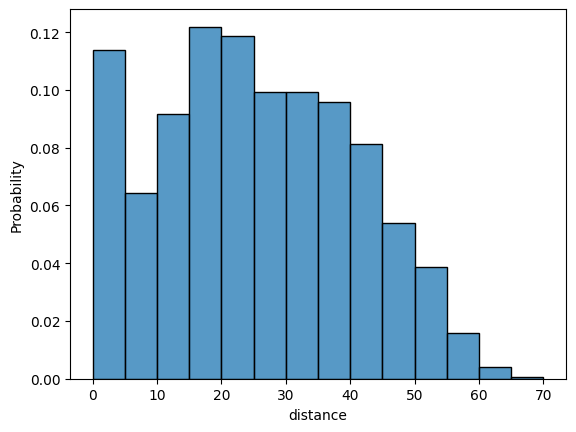

In [11]:
lh=sns.histplot(df[df.light=='light'].distance, stat='probability', binwidth=5)

In [12]:
def plot_histplot_lever_position(ax, lightCondition):
    if lightCondition=='light':
        color=lightDarkColors()[0]
    else:
        color=lightDarkColors()[1]
    sns.histplot(df[df.light==lightCondition].distance, stat='probability', binwidth=5, color=color)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False) 
    ax.set_xlabel('Lever pos. distance')
    ax.set_ylabel('Proportion\nof trials')
    ax.set_ylim([0,0.18])
    
    if lightCondition=='dark':
        legend_elements = [mpatches.Patch(facecolor=lightDarkColors()[1], edgecolor='black', label='dark')]
    else:
        legend_elements=[mpatches.Patch(facecolor=lightDarkColors()[0], edgecolor='black', label='light')]

    plt.legend(handles=legend_elements, loc="upper right", title="", borderaxespad=0., frameon=False)


In [13]:
#This is the probability of no position change of the lever in light trials
df[df.light=='light'].distance[df[df.light=='light'].distance<5].shape[0]/df[df.light=='light'].distance.shape[0]

0.11387934326078655

In [14]:
#This is the propbability of no position change of the lever in dark trials
df[df.light=='dark'].distance[df[df.light=='dark'].distance<5].shape[0]/df[df.light=='dark'].distance.shape[0]

0.15913746630727763

In [15]:

df['light_lever_change'] = np.where((df['light'] == 'light') & (df['distance'] < 5), 'light_no_change', 'light_change')
df['light_lever_change'] = np.where((df['light'] == 'dark') & (df['distance'] < 5), 'dark_no_change', df['light_lever_change'])
df['light_lever_change'] = np.where((df['light'] == 'dark') & (df['distance'] > 5), 'dark_change', df['light_lever_change'])
df['light_lever_change']

0           light_change
1        light_no_change
2        light_no_change
3        light_no_change
4           light_change
              ...       
19746        dark_change
19747       light_change
19748        dark_change
19749       light_change
19750     dark_no_change
Name: light_lever_change, Length: 19751, dtype: object

In [16]:
df.light_lever_change[(df.light_lever_change=='light_no_change')].shape[0]/df[df.light=='light'].light_lever_change.shape[0]

0.11387934326078655

In [17]:
def darkLightColors(lighter=False):
    """
    Create a palette that can be used to plot dark and light trials
    
    Use to keep color constant across figures.
    First color is for dark, second is for light
    """
    if lighter:
        rgb = [(50, 50, 120),(206, 159, 70)]  # took the values from Maryam's work in Inkscape
        colors = [tuple(t / 255 * 1.2 for t in x) for x in rgb]
    else:
        rgb = [(50, 50, 120),(206, 159, 70)]  # took the values from Maryam's work in Inkscape
        colors = [tuple(t / 255 for t in x) for x in rgb]
        
    return colors

def lightDarkColors(lighter=False):
    """
    Create a palette that can be used to plot light and dark trials
    
    Use to keep color constant across figures.
    First color is for light, second is for dark
    """
    if lighter:
        rgb = [(180, 159, 70),(50, 50, 120)]  # took the values from Maryam's work in Inkscape
        colors = [tuple(t / 255 * 1.3 for t in x) for x in rgb]
    else:
        rgb = [(180, 159, 70),(50, 50, 120)]  # took the values from Maryam's work in Inkscape
        colors = [tuple(t / 255 for t in x) for x in rgb]
        
    return colors



def plotSearchLength(ax,df):
    dfg = df["searchLength"].groupby([df['subject'],df["light_lever_change"]])
    dfg = dfg.median().reset_index()
    dfg.light_lever_change[dfg["light_lever_change"]=="light_no_change"] = "Light, same"
    dfg.light_lever_change[dfg["light_lever_change"]=="dark_no_change"] = "Dark, same"
    dfg.light_lever_change[dfg["light_lever_change"]=="light_change"] = "Light, change"
    dfg.light_lever_change[dfg["light_lever_change"]=="dark_change"] = "Dark, change"
    
    myColors = darkLightColors()
    sns.stripplot(data=dfg, x="light_lever_change",y="searchLength",order = ["Dark, change", "Dark, same","Light, change", "Light, same"],hue="light_lever_change",
                  palette=[*np.tile(darkLightColors(lighter=False)[0],(2,1)),*np.tile(darkLightColors(lighter=False)[1],(2,1))],alpha=0.5, size=5, edgecolor='#373737', linewidth=1, color='black')
    
    ymax=195
    ax.set_ylim(0,ymax)
    ax.set_yticks([0,50,100,150])
    ax.set_ylabel("Search path\n length (cm)")
    ax.set_xlabel("")
    ax.set_xlim([-0.5,3.5])
    ax.tick_params(axis='x', labelrotation=30)
    ax.set_xticklabels(["Change", "Same","Change", "Same"])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)  

    
    # statistics
    u,p =  wilcoxon(dfg.searchLength[dfg["light_lever_change"]=="Dark, change"],
                        dfg.searchLength[dfg["light_lever_change"]=="Dark, same"])
    print(u,p)
    u,p =  wilcoxon(dfg.searchLength[dfg["light_lever_change"]=="Dark, same"],
                    dfg.searchLength[dfg["light_lever_change"]=="Light, same"])
    print(u,p)
    u,p =  wilcoxon(dfg.searchLength[dfg["light_lever_change"]=="Light, change"],
                    dfg.searchLength[dfg["light_lever_change"]=="Light, same"])
    print(u,p)
    
    n = len(dfg.searchLength[dfg["light_lever_change"]=="Dark, change"])
    ax.text(0, ymax*0.93, f"$N$ = {n}",fontsize=9)
    pairs=[('Dark, change','Dark, same')]
    annotator = Annotator(ax, data=dfg, pairs=pairs, x='light_lever_change', y="searchLength", order=['Dark, change','Dark, same'])
    annotator.configure(test="Wilcoxon", text_format='star', loc='inside', line_height=0.02, text_offset=2, verbose=2)
    annotator.apply_test().annotate(line_offset_to_group=0.035, line_offset=0.02)
    
    
    plt.legend([],[], frameon=False)
#
def plotHomingErrorAtPeripheryAbsolute(ax,df):
    
    df["homingErrorAtPeripheryAbsolute"] = df.homingErrorAtPeriphery.abs()
    
    dfg = df["homingErrorAtPeripheryAbsolute"].groupby([df['subject'],df["light_lever_change"]])
    dfg = dfg.median().reset_index()
    dfg.light_lever_change[dfg["light_lever_change"]=="light_no_change"] = "Light, same"
    dfg.light_lever_change[dfg["light_lever_change"]=="dark_no_change"] = "Dark, same"
    dfg.light_lever_change[dfg["light_lever_change"]=="light_change"] = "Light, change"
    dfg.light_lever_change[dfg["light_lever_change"]=="dark_change"] = "Dark, change"
    
    myColors = darkLightColors()
    sns.stripplot(data=dfg, x="light_lever_change",y="homingErrorAtPeripheryAbsolute",order = ["Dark, change", "Dark, same","Light, change", "Light, same"],hue="light_lever_change",
                  palette=[*np.tile(darkLightColors(lighter=False)[0],(2,1)),*np.tile(darkLightColors(lighter=False)[1],(2,1))],alpha=0.5, size=5, edgecolor='#373737', linewidth=1, color='black')

    
    ymax=np.pi/2 + .2
    ax.set_ylim(0,ymax)
    ax.set_yticks([0,np.pi/4,np.pi/2])
    ax.set_yticklabels(["0",r'$\pi/4$', "$\pi/2$"])
    ax.tick_params(axis='x', labelrotation=30)
    ax.set_xticklabels(["Change", "Same","Change", "Same"])

    ax.set_ylabel("Error at peri.\n(rad)")
    ax.set_xlabel("")

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)  

    plt.legend([],[], frameon=False)
    ax.plot([-0.5,3.35],[np.pi/2,np.pi/2],"--",color="gray")
    ax.text(0.85,np.pi/2+0.1,"Chance level",horizontalalignment='center',fontsize=9)

    # statistics
    u,p =  wilcoxon(dfg["homingErrorAtPeripheryAbsolute"][dfg["light_lever_change"]=="Dark, change"],
                        dfg["homingErrorAtPeripheryAbsolute"][dfg["light_lever_change"]=="Dark, same"])
    print(u,p)
    u,p =  wilcoxon(dfg["homingErrorAtPeripheryAbsolute"][dfg["light_lever_change"]=="Dark, same"],
                        dfg["homingErrorAtPeripheryAbsolute"][dfg["light_lever_change"]=="Light, same"])
    print(u,p)
    u,p =  wilcoxon(dfg["homingErrorAtPeripheryAbsolute"][dfg["light_lever_change"]=="Light, change"],
                        dfg["homingErrorAtPeripheryAbsolute"][dfg["light_lever_change"]=="Light, same"])
    print(u,p)

        
    pairs=[('Dark, change','Dark, same')]
    annotator = Annotator(ax, data=dfg, pairs=pairs, x='light_lever_change', y="homingErrorAtPeripheryAbsolute", order=['Dark, change','Dark, same'])
    annotator.configure(test="Wilcoxon", text_format='star', loc='inside', line_height=0.02, text_offset=2, verbose=2)
    annotator.apply_test().annotate(line_offset_to_group=0.035, line_offset=0.02)


/tmp/ipykernel_163874/3078750.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Change", "Same","Change", "Same"])
/home/kilo/miniconda3/envs/spikeA/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/home/kilo/miniconda3/envs/spikeA/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/tmp/ipykernel_163874/3078750.py:101: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Change", "Same","Change", "Same"])
/home/kilo/miniconda3/envs/spikeA/lib/python3.11/si

47.0 0.17425537109375
0.0 1.52587890625e-05
10.0 0.0006561279296875
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Dark, change vs. Dark, same: Wilcoxon test (paired samples), P_val:1.743e-01 Stat=4.700e+01
67.0 0.677703857421875
0.0 1.52587890625e-05
76.0 1.0
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Dark, change vs. Dark, same: Wilcoxon test (paired samples), P_val:6.777e-01 Stat=6.700e+01


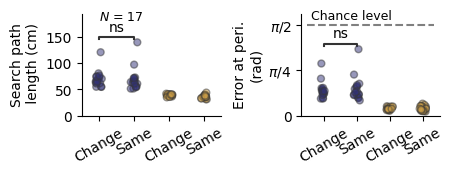

In [18]:
rowSize,colSize= figurePanelDefaultSize()
nPlots=4

#Wilcoxon test is neccessary because samples (light and dark) are dependent (stem from same subject), thus MWU-Test is not appropriate.
custom_long_name = 'Wilcoxon Test'
custom_short_name = 'Wilcoxon'
custom_func = wilcoxon
custom_test = StatTest(custom_func, custom_long_name, custom_short_name)


fig = plt.figure(figsize=(nPlots*colSize, 1*rowSize), constrained_layout=True) # create a figure
spec = fig.add_gridspec(ncols=nPlots, nrows=2,height_ratios=[0.15,0.9]) # create a GridSpec object to a figure
ax = fig.add_subplot(spec[1,0]) # add an axes to the figure
plotSearchLength(ax,df)

ax = fig.add_subplot(spec[1,1]) # add an axes to the figure
plotHomingErrorAtPeripheryAbsolute(ax,df)

plt.show()

/tmp/ipykernel_163874/3078750.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Change", "Same","Change", "Same"])
/home/kilo/miniconda3/envs/spikeA/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/home/kilo/miniconda3/envs/spikeA/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/tmp/ipykernel_163874/3078750.py:101: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Change", "Same","Change", "Same"])
/home/kilo/miniconda3/envs/spikeA/lib/python3.11/si

47.0 0.17425537109375
0.0 1.52587890625e-05
10.0 0.0006561279296875
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Dark, change vs. Dark, same: Wilcoxon test (paired samples), P_val:1.743e-01 Stat=4.700e+01
67.0 0.677703857421875
0.0 1.52587890625e-05
76.0 1.0
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Dark, change vs. Dark, same: Wilcoxon test (paired samples), P_val:6.777e-01 Stat=6.700e+01


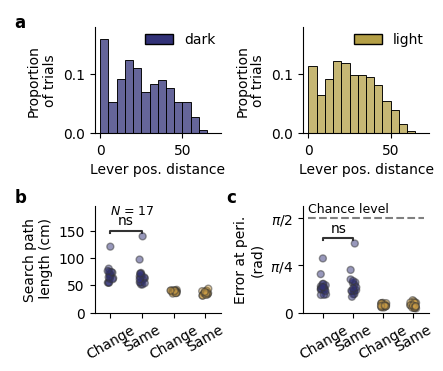

In [19]:
rowSize,colSize= figurePanelDefaultSize()
nPlots=2

#Wilcoxon test is neccessary because samples (light and dark) are dependent (stem from same subject), thus MWU-Test is not appropriate.
custom_long_name = 'Wilcoxon Test'
custom_short_name = 'Wilcoxon'
custom_func = wilcoxon
custom_test = StatTest(custom_func, custom_long_name, custom_short_name)

fig = plt.figure(figsize=(nPlots*colSize*1.2, 2*rowSize), constrained_layout=True) # create a figure
spec = fig.add_gridspec(ncols=nPlots+1, nrows=4,height_ratios=[0.15,0.9, 0.15,0.9], width_ratios=[0.1,1,1])
Letterspec = fig.add_gridspec(ncols=1, nrows=1) # create a GridSpec object to a figure

ax = fig.add_subplot(spec[3,1]) # add an axes to the figure
plotSearchLength(ax,df)

ax = fig.add_subplot(spec[3,2]) # add an axes to the figure
plotHomingErrorAtPeripheryAbsolute(ax,df)

ax = fig.add_subplot(spec[1,1])
plot_histplot_lever_position(ax, lightCondition='dark')

ax = fig.add_subplot(spec[1,2])
plot_histplot_lever_position(ax, lightCondition='light')

ax = fig.add_subplot(Letterspec[0])
ax.text(0.01,0.95, 'a', style='normal',fontsize=12, weight="bold", transform=ax.transAxes)
ax.text(0.01,0.45, 'b', style='normal',fontsize=12, weight="bold", transform=ax.transAxes)
ax.text(0.51,0.45, 'c', style='normal',fontsize=12, weight="bold", transform=ax.transAxes)
ax.axis('off')

plt.savefig('../../Output/Sup_Figure12.pdf', bbox_inches='tight', dpi=300)